## K-Means

Comenzamos limpiando los datos como hicimos en `introducing-to-clustering.ipynb`

Text(0.5, 1.0, 'Top genres')

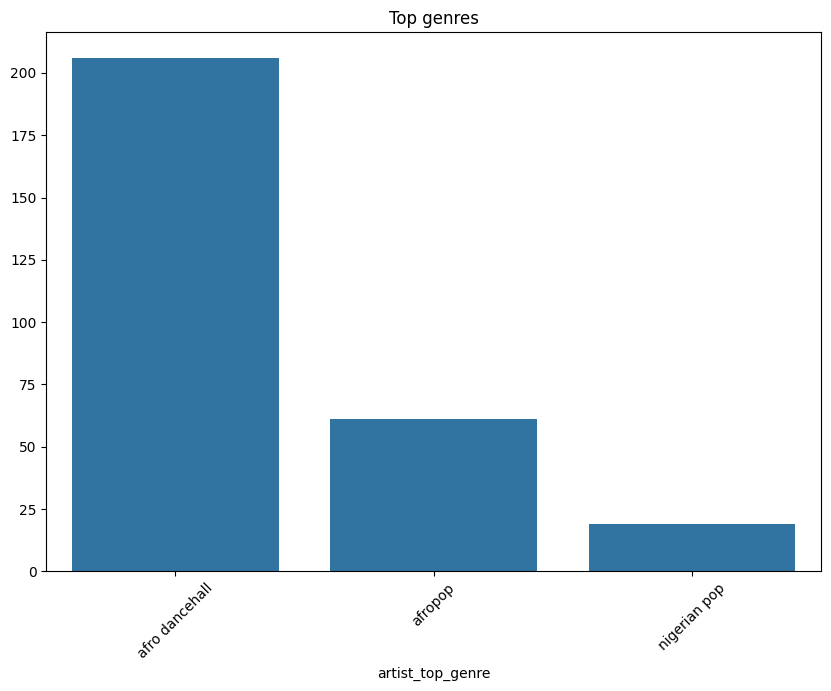

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("./data/nigerian-songs.csv")
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres')

Crea un gráfico de caja, llamando a `boxplot()` para cada columna:

<Axes: xlabel='release_date'>

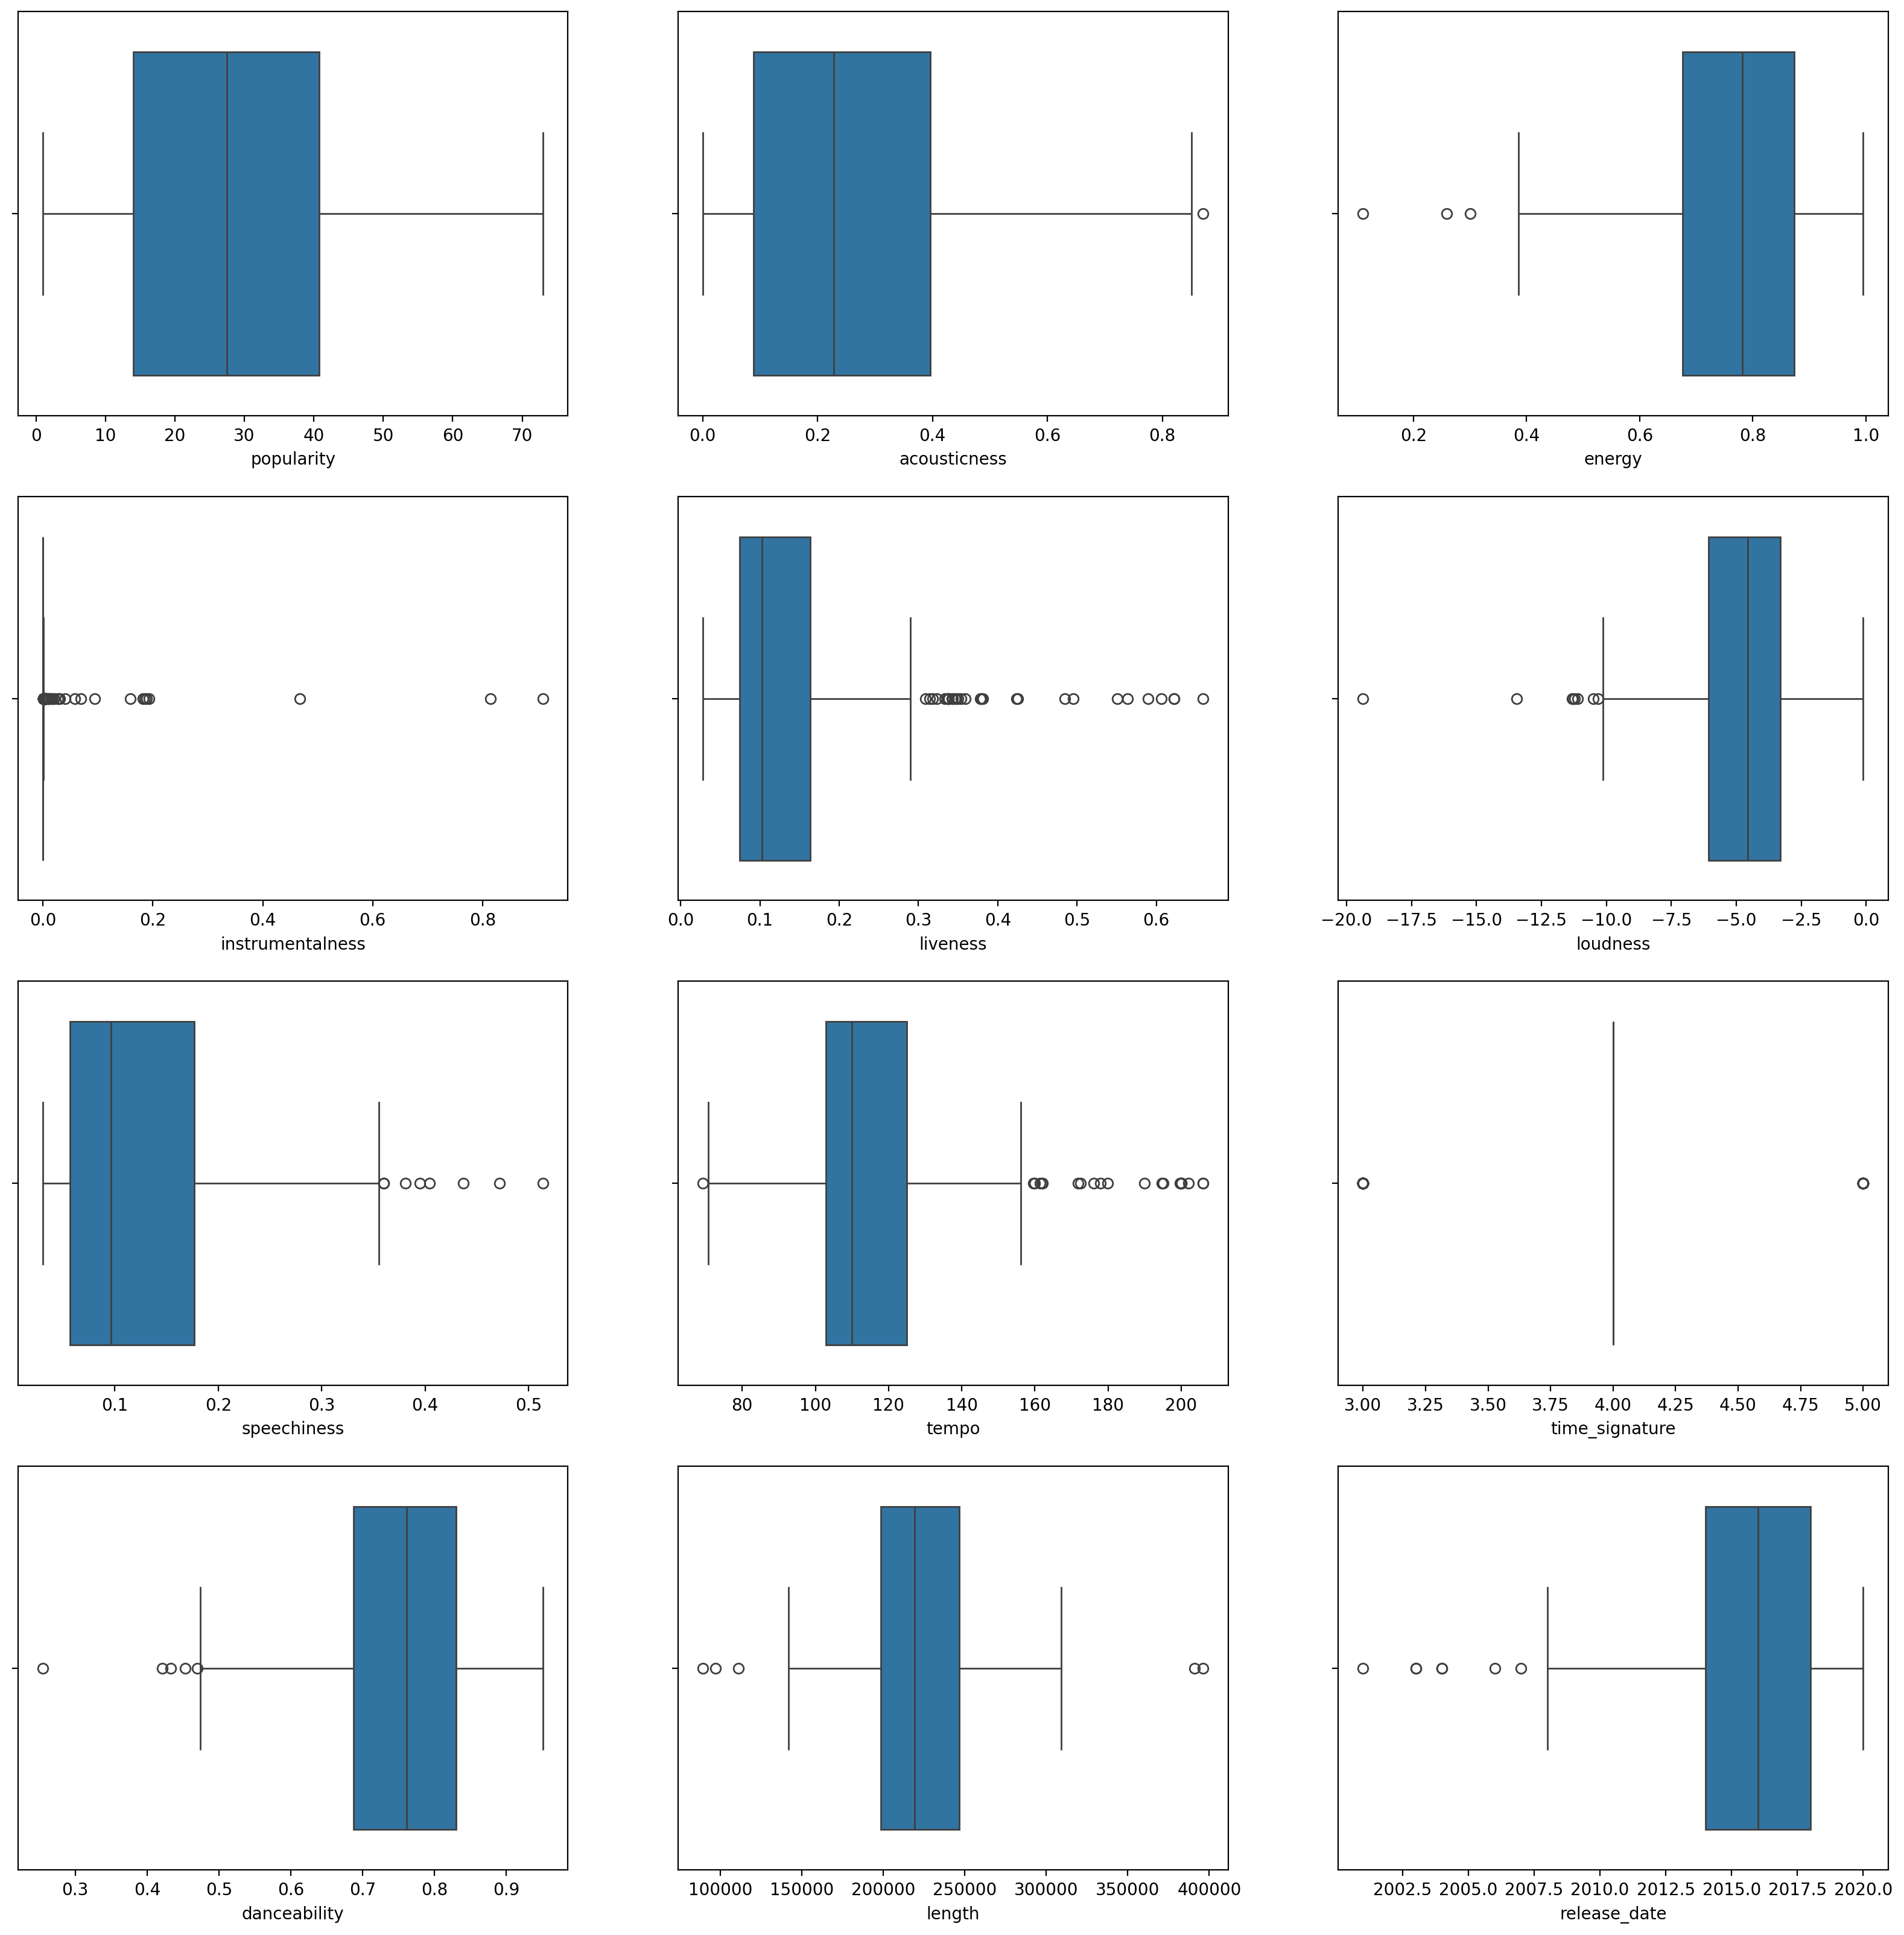

In [7]:


plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

Podrías revisar el conjunto de datos y remover estos valores atípicos, pero eso haría que quedara un mínimo de datos.

Por ahora, elegimos qué columnas usar para el agrupamiento. Elegir unas con rangos similares y codificar la columna `artist_top_genre` como datos numéricos:

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = df.loc[:, ('artist_top_genre','popularity','danceability','energy')]

y = df['artist_top_genre']

# Esto asigna un número único a cada valor único presente en la columna 'artist_top_genre'
X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

# Codificamos los valores de la variable objetivo
y = le.transform(y)


Ahora necesitamoss elegir a cuántos grupos apuntar. Sabemos que hay 3 géneros de canciones que extrajimos de el conjunto de datos, así que probemos con 3:

In [38]:
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans # Arreglo impreso con los grupos predichos (0, 1, 0 2) para cada fila del dataframe.

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0])

Usa este arreglo para calcular un `silhouette score`:

In [39]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5855873875235418

### Silhouette score

Buscamos un Silhouette Score más cercano a 1. Este puntaje varía de -1 a 1, y si el puntaje es 1, el grupo es denso y bien separado de otros grupos. Un valor cercano a 0 representa grupos superpuestos con muestras muy cercanas al límite de decisión de los grupos vecinos.

Nuestro puntaje es de .53, justo a la mitad. Esto indica que nuestros datos no son particularmente adecuados para este tipo de agrupamiento, pero continuemos.

#### Build a Model

Importamos `KMeans` e iniciamos el proceso de agrupamiento.



In [43]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Hay algunas partes que requieren explicación.

🎓 range: These are the iterations of the clustering process

🎓 random_state: "Determines random number generation for centroid initialization." 

🎓 WCSS: "within-cluster sums of squares" mide la distancia cuadrática promedio de todos los puntos dentro de un grupo al centroide dle grupo.

🎓 Inertia: Los algoritmos K-means intentan elegir los centroides para minimizar la 'inertia (inercia)', "una medida de cuánta coherencia interna tienen los grupos."

🎓 k-means++: En Scikit-learn puedes usar la optimización 'k-means++', la cual "inicializa los centroides para que sean (generalmente) distantes uno de otro, llevando a probablemente mejores resultados que la inicialización aleatoria".

#### Elbow method
Anteriormente, supusiste que, porque has apuntado a 3 géneros de canciones, deberías elegir 3 clusters (grupos). ¿Pero es el caso?

Use the 'elbow method' to make sure.



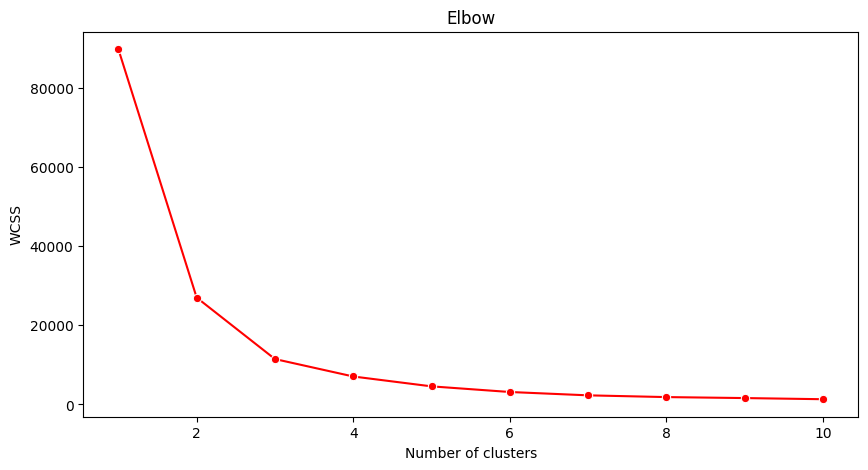

In [41]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

El método del "codo" (elbow method) es comúnmente utilizado para seleccionar el número óptimo de clusters en K-means basándose en el WCSS. Consiste en trazar un gráfico de WCSS versus el número de clusters y observar dónde se produce un "codo" o un cambio significativo en la tasa de disminución de WCSS.

En nuestro caso el cambio significativo o "codo" se da para el número 3.

### Mostrar los grupos

Probamos el proceso de nuevo, configurando 3 grupos, y mostramos los grupos como un gráfico de dispersión:


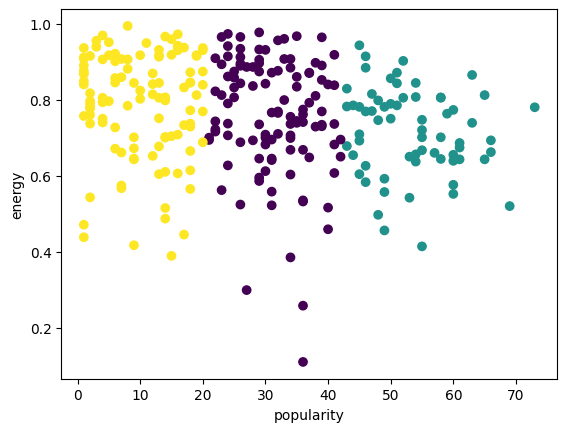

In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['energy'],c = labels)
plt.xlabel('popularity')
plt.ylabel('energy')
plt.show()

Revisando la precisión del modelo:

In [48]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 112 out of 286 samples were correctly labeled.
Accuracy score: 0.39


La precisión de este modelo no es buena, y la forma de los grupos te dará una pista del por qué.

Estos datos están demasiado desequilibrados, muy poco correlacionados y tienen demasiada varianza entre los valores de columna para agrupar bien. De hecho, los grupos que forman están probablemente fuertemente influenciados o sesgados por las tres categorías de géneros que definimos arriba. ¡Eso fue un proceso de aprendizaje!

En la documentación de Scikit-learn, puedes ver que un modelo como este, con grupos no muy bien demarcados, tienen un problema de 'varianza'